In [1]:
import zipfile, os
import glob
import cv2
import matplotlib.pyplot as plt
!pip install tqdm
from tqdm import tqdm
import numpy as np
from skimage.restoration import denoise_nl_means
from skimage.filters import unsharp_mask

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Semester2/ComputerVision/Dataset"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


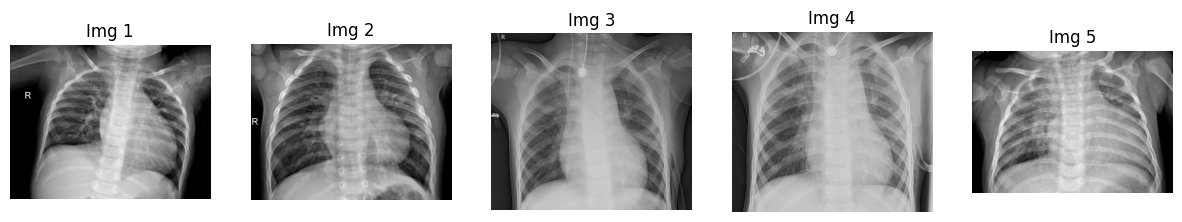

In [3]:
files = os.listdir(path)

plt.figure(figsize=(15, 5))
for i, file_name in enumerate(files):
    img_path = os.path.join(path, file_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(files), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Img {i+1}")
    plt.axis("off")

plt.show()

CROPPING dan Resize

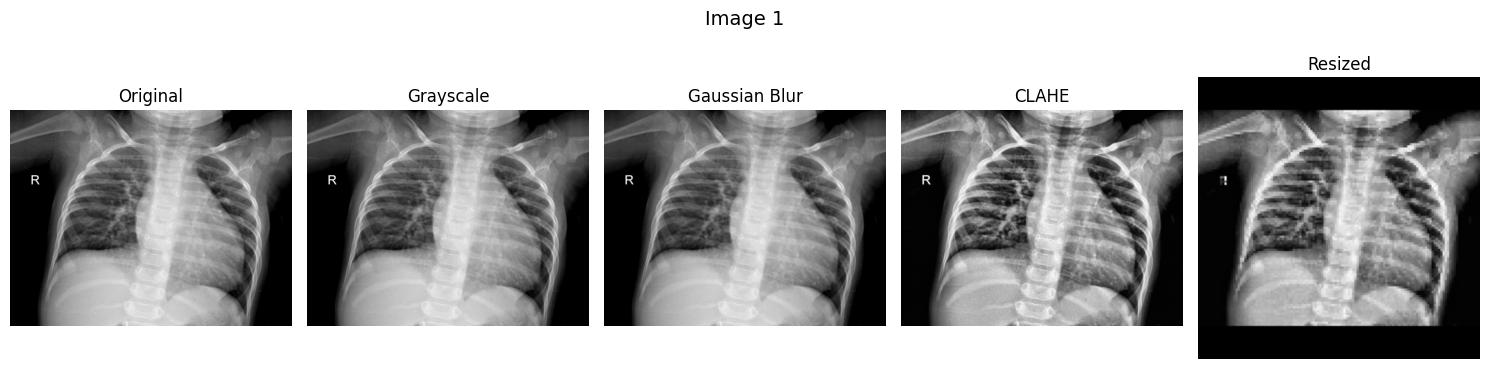

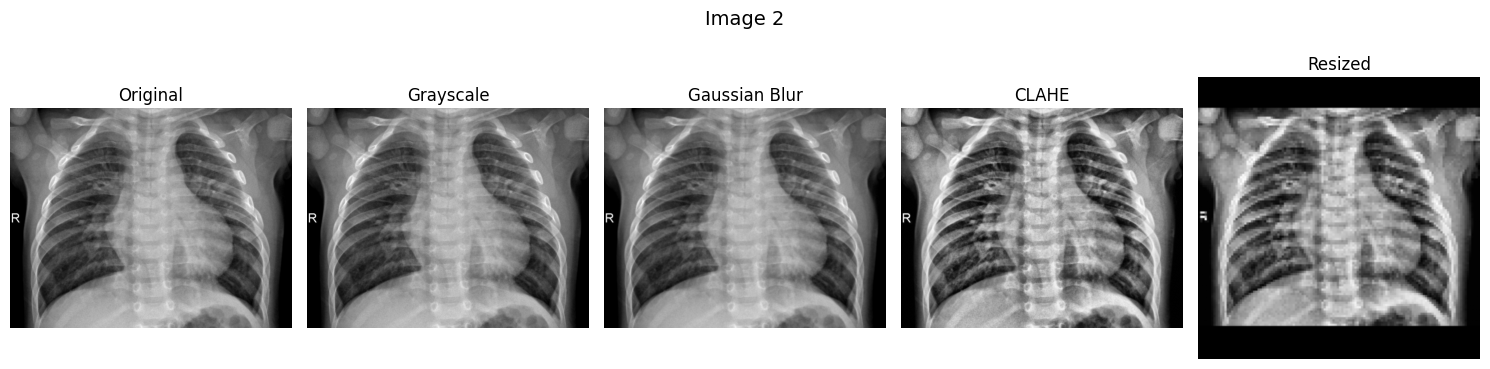

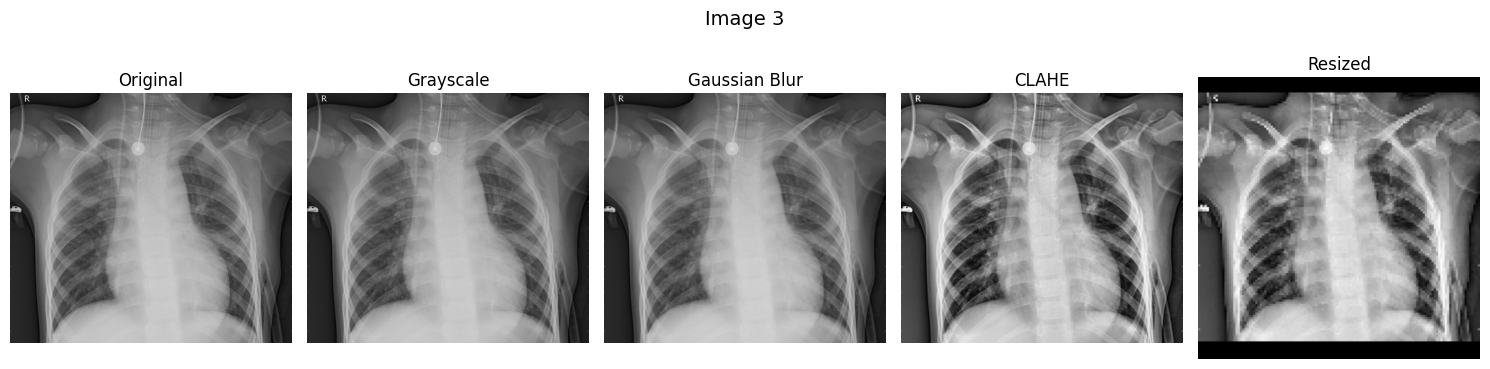

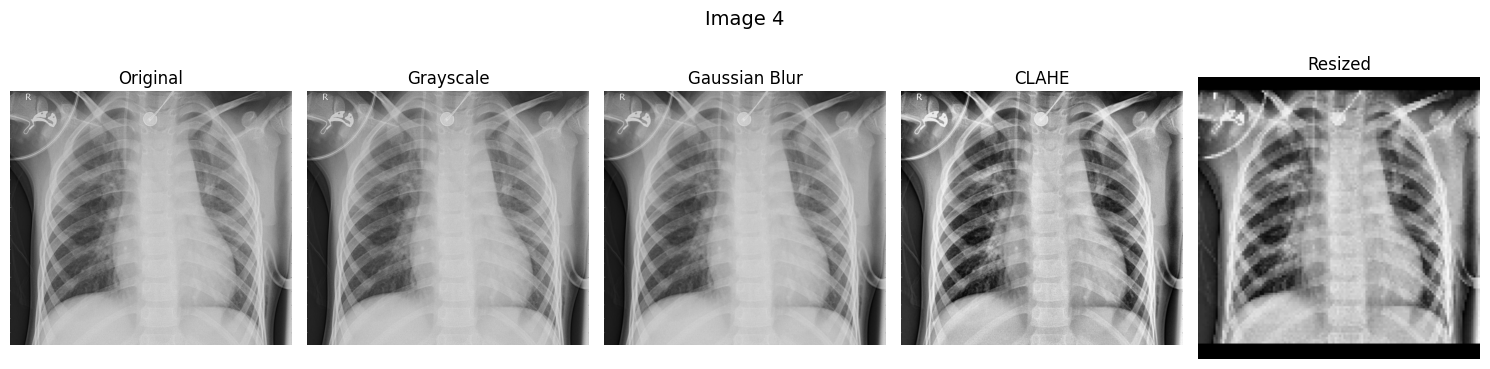

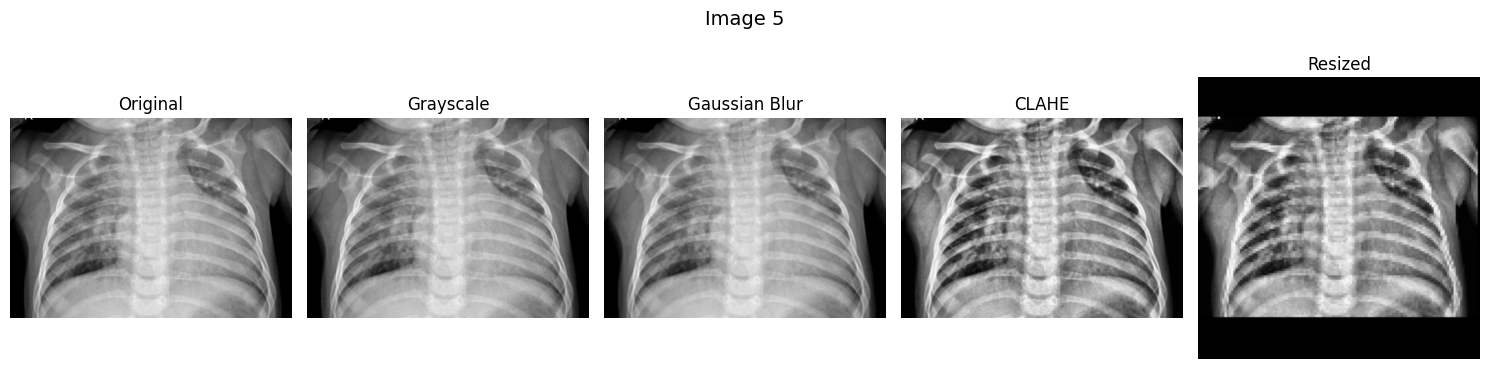

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# resize dengan padding
def resize_with_padding(img, size=(128,128)):
    target_w, target_h = size
    h, w = img.shape[:2]
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(img, (new_w, new_h))
    result = np.zeros((target_h, target_w), dtype=img.dtype)
    x_offset = (target_w - new_w) // 2
    y_offset = (target_h - new_h) // 2
    result[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized
    return result

# load semua gambar
images = []
file_names = os.listdir(path)
for file_name in file_names:
    img_path = os.path.join(path, file_name)
    img = cv2.imread(img_path)
    if img is not None:
        images.append(img)

# tampilkan urutan preprocessing untuk semua gambar
for idx, img in enumerate(images):
    # 1. original (RGB)
    original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 2. grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 3. gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # 4. CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(blur)

    # 5. resize with padding
    resized = resize_with_padding(clahe)

    # plot semua tahap
    plt.figure(figsize=(15,4))
    plt.subplot(1,5,1); plt.imshow(original); plt.title("Original"); plt.axis("off")
    plt.subplot(1,5,2); plt.imshow(gray, cmap="gray"); plt.title("Grayscale"); plt.axis("off")
    plt.subplot(1,5,3); plt.imshow(blur, cmap="gray"); plt.title("Gaussian Blur"); plt.axis("off")
    plt.subplot(1,5,4); plt.imshow(clahe, cmap="gray"); plt.title("CLAHE"); plt.axis("off")
    plt.subplot(1,5,5); plt.imshow(resized, cmap="gray"); plt.title("Resized"); plt.axis("off")

    plt.suptitle(f"Image {idx+1}", fontsize=14)
    plt.tight_layout()
    plt.show()
